<a href="https://colab.research.google.com/github/taobeto/neuroscience/blob/main/Carlos_Alberto_Pena_Sanchez_Lab_Modelo_de_Hodgkin_Huxley_VClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Hodgkin y Huxley

# Simulación del Modelo de Hodgkin-Huxley

Este notebook tiene como objetivo simular el modelo clásico de Hodgkin-Huxley para una neurona y observar de manera numérica cómo se comporta una célula antes diferentes protocolos de simulación. El modelo de Hodgkin-Huxley describe la dinámica de la membrana neuronal utilizando ecuaciones diferenciales que capturan la evolución de variables de estado como el potencial de membrana y las conductancias de los canales iónicos.

### Modelo de Hodgkin-Huxley

Las ecuaciones que describen el modelo son las siguientes:

$
C_m \frac{dV}{dt} = I_{ext} - (I_{Na} + I_K + I_L)
$

donde:
- $ V $ es el potencial de membrana,
- $ C_m $ es la capacidad de la membrana,
- $ I_{ext} $ es la corriente externa aplicada,
- $ I_{Na} $, $ I_K $ y $ I_L $ son las corrientes de sodio, potasio y fuga, respectivamente.

### Corrientes iónicas

Las corrientes $ I_{Na} $, $ I_K $ y $ I_L $ se modelan de la siguiente manera:

$
I_{Na} = \bar{g}_{Na} m^3 h (V - E_{Na})
$
$
I_K = \bar{g}_K n^4 (V - E_K)
$
$
I_L = \bar{g}_L (V - E_L)
$

donde $ \bar{g} $ son las conductancias máximas, $ E $ son los potenciales de equilibrio y $ m $, $ h $, $ n $ son variables de compuerta.

### Variables de compuerta

Las variables $ m $, $ h $, y $ n $ siguen ecuaciones del tipo:

$
\frac{dx}{dt} = \alpha_x (1 - x) - \beta_x x
$

donde $ x $ puede ser $ m $, $ h $ o $ n $, y $ \alpha_x $ y $ \beta_x $ son funciones del potencial de membrana $ V $.

Para este ejercicio use las siguientes definiciones de $\alpha_x$ y $\beta_x$:

$$
\alpha_n = \frac{0.01(V+55)}{1-exp(-(V+55)/10)}
$$

$$
\beta_n = 0.125exp(-(V+65)/80)
$$


$$
\alpha_m = \frac{0.1(V+40)}{1-exp(-(V+40)/10)}
$$

$$
\beta_m = 4exp(-(V+65)/18)
$$

$$
\alpha_h = 0.07exp(-(V+65)/20)
$$

$$
\beta_h = \frac{1}{1+exp(-(V+35)/10)}
$$

así como $C_m = 1\mu/cm^2$, $\bar{g}_{Na} = 120ms/cm^2$, $\bar{g}_K = 36ms/cm^2$, $\bar{g}_L = 0.3 ms/cm^2$, $E_{Na} = 50mV$, $E_K = -77mV$, $E_L = -50mV$.


### Ejercicio 1:
Use un protocolo de estimulación que como el que se muestra en la figura a continuación y reconstruya el mismo gráfico. El protocolo de estimulación consiste en pulsos de 5 milisengundos de amplitud 5 el primero y 25 el segundo. Tenga en cuenta que este gráfico tiene parámetros ligeramente diferentes que hace que el potencial de membrana este movido a $V_{rest} = 0$.

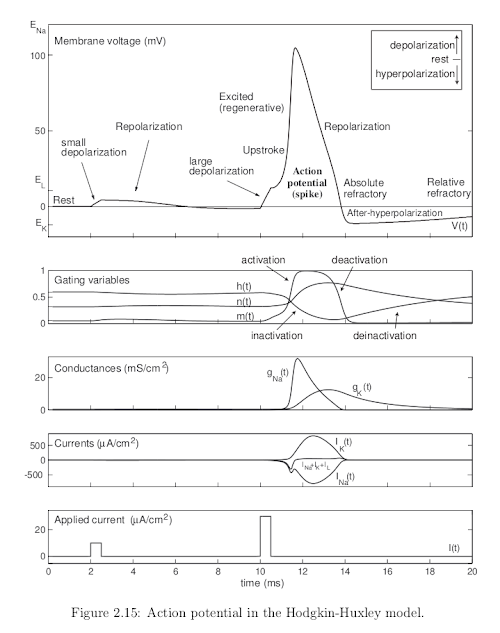

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt




def Iext(t):
  if t < 2:
    Iext = 0
  elif t >= 2 and t <= 2.5 :
    Iext = 5
  elif t >= 10 and t <= 10.5 :
    Iext = 25
  else:
    Iext = 0
  return Iext


def Hodgkin_Huxley(t, X, Cm, gna, gk, gl, Ena, Ek, El):

  V = X[0]
  n = X[1]
  m = X[2]
  h = X[3]


  I_ext= Iext(t)

  an = 0.01*(V+55)/(1-np.exp(-(V+55)/10))
  bn = 0.125*np.exp(-(V+65)/80)
  am = 0.1*(V+40)/(1-np.exp(-(V+40)/10))
  bm = 4*np.exp(-(V+65)/18)
  ah = 0.07*np.exp(-(V+65)/20)
  bh = 1/(1+np.exp(-(V+35)/10))


  dndt = an*(1-n)-bn*n
  dmdt = am*(1-m)-bm*m
  dhdt = ah*(1-h)-bh*h

  Ina = gna*m**3*h*(V-Ena)
  Ik = gk*n**4*(V-Ek)
  Il = gl*(V-El)


  dVdt = (I_ext -(Ina + Ik + Il))/Cm
  return [dVdt, dndt, dmdt,dhdt]

#parametros
Cm,gna,gk,gl,Ena,Ek,El = 1,120,36,0.3,50,-77,-50

tspan = [0, 25]
X0 = [0,0,0,0]

solucion = solve_ivp(Hodgkin_Huxley, tspan, X0,
                     args = (Cm,gna,gk,gl,Ena,Ek,El), dense_output = True)







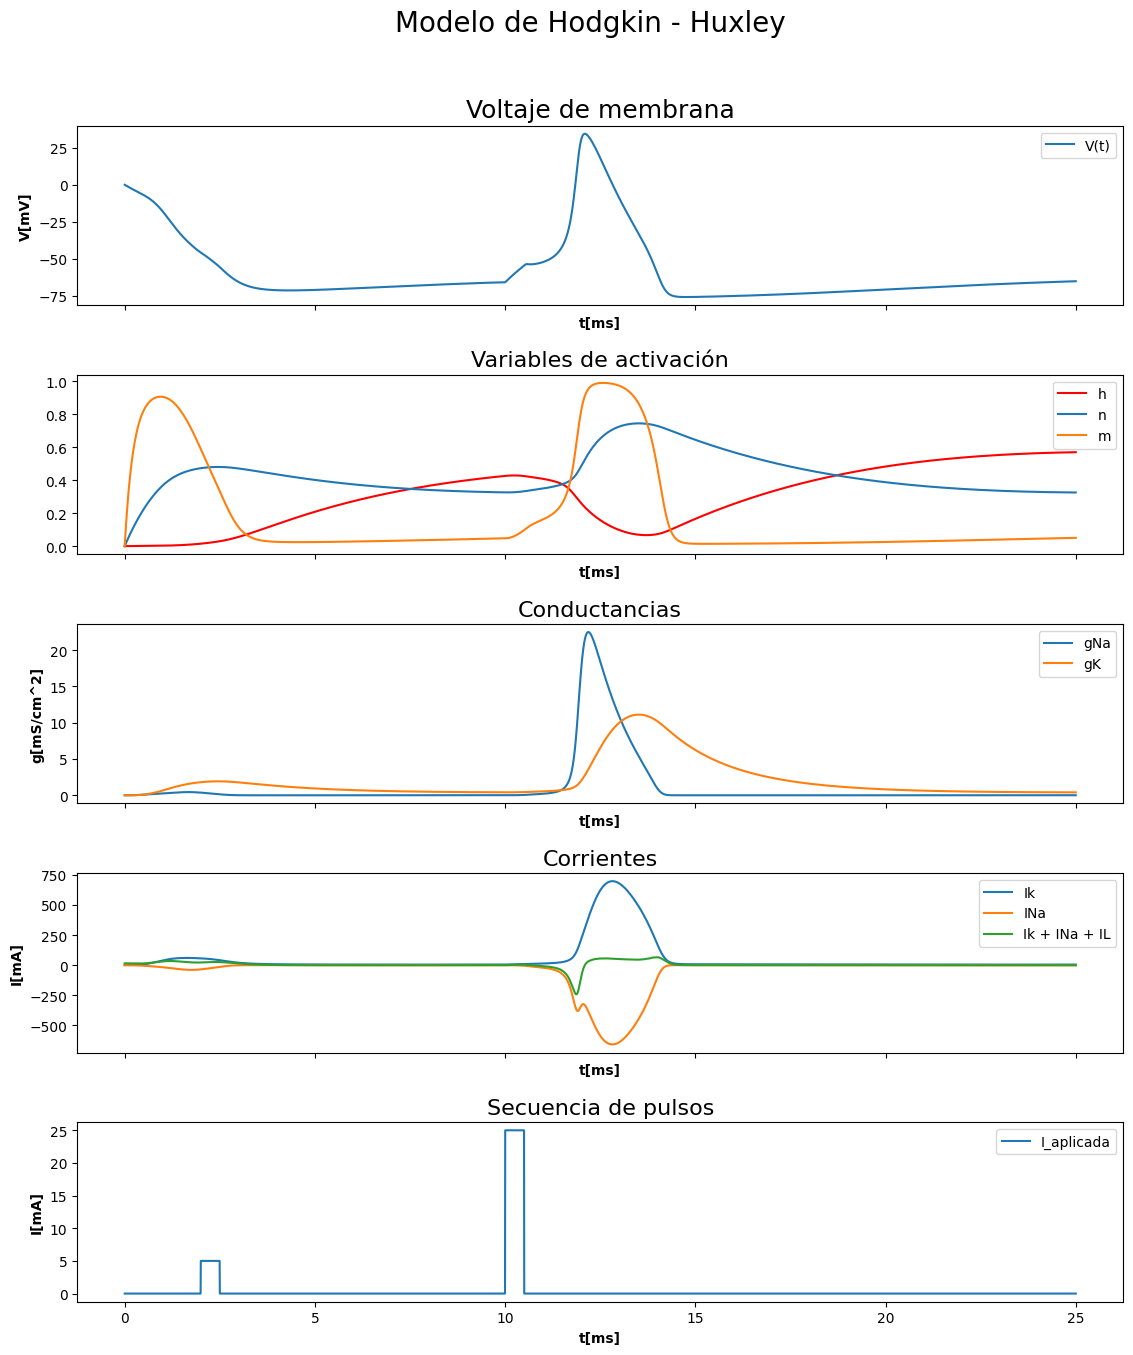

In [ ]:
tdenso = np.linspace(tspan[0], tspan[-1], 5000)
V, n, m, h = solucion.sol(tdenso)


# Se calcula las conductancias (variables dependietes para el primer grafico)
# de cada ion al dividir la corriente por el potencial asociado a ella (V-Ex),
# donde x es el ion Na y  K. gX = variable, gx = conductancia máxima brindada

gNa = gna*m**3*h
gK = gk*n**4
Ina = gNa * (V - Ena)
Ik = gK*(V - Ek)
Il = gl*(V - El)
I_total = Ina + Ik + Il
I_aplicada = np.array([Iext(i) for i in tdenso])

fig, axs = plt.subplots(5, 1, figsize = (12,14), sharex = True)
fig.suptitle('Modelo de Hodgkin - Huxley', fontsize = 20)
fig.tight_layout(pad = 4.0)


axs[0].plot(tdenso, V, label = 'V(t)')
axs[0].set_title('Voltaje de membrana', fontsize = 18)
axs[0].set_ylabel('V[mV]', fontweight = 'bold')
axs[0].set_xlabel('t[ms]', fontweight = 'bold')
axs[0].legend()

axs[1].plot(tdenso, h, label = 'h', color = 'red')
axs[1].plot(tdenso, n, label = 'n')
axs[1].plot(tdenso, m, label = 'm')
axs[1].set_title('Variables de activación', fontsize = 16)
axs[1].set_xlabel('t[ms]', fontweight = 'bold')
axs[1].legend()

axs[2].plot(tdenso, gNa, label = 'gNa')
axs[2].plot(tdenso, gK, label = 'gK')
axs[2].set_title('Conductancias', fontsize = 16)
axs[2].set_xlabel('t[ms]', fontweight = 'bold')
axs[2].set_ylabel('g[mS/cm^2]', fontweight = 'bold')
axs[2].legend()

axs[3].plot(tdenso, Ik, label = 'Ik')
axs[3].plot(tdenso, Ina, label = 'INa')
axs[3].plot(tdenso, I_total, label = 'Ik + INa + IL')
axs[3].set_xlabel('t[ms]', fontweight = 'bold')
axs[3].set_ylabel('I[mA]', fontweight = 'bold')
axs[3].set_title('Corrientes', fontsize = 16)
axs[3].legend()

axs[4].plot(tdenso, I_aplicada, label = 'I_aplicada')
axs[4].set_title('Secuencia de pulsos', fontsize = 16)
axs[4].set_xlabel('t[ms]', fontweight = 'bold')
axs[4].set_ylabel('I[mA]', fontweight = 'bold')
axs[4].legend()













# Ejercicio 2:

Repita el ejercicio anterior pero ahora aplique otro pulso de amplitud 25$\mu A/cm^2$ a los 15ms y responda las siguientes preguntas:

1. Qué esperaría observar?
2. Qué observa en cambio esta vez?
3. Investigue por qué se da el periodo refractario

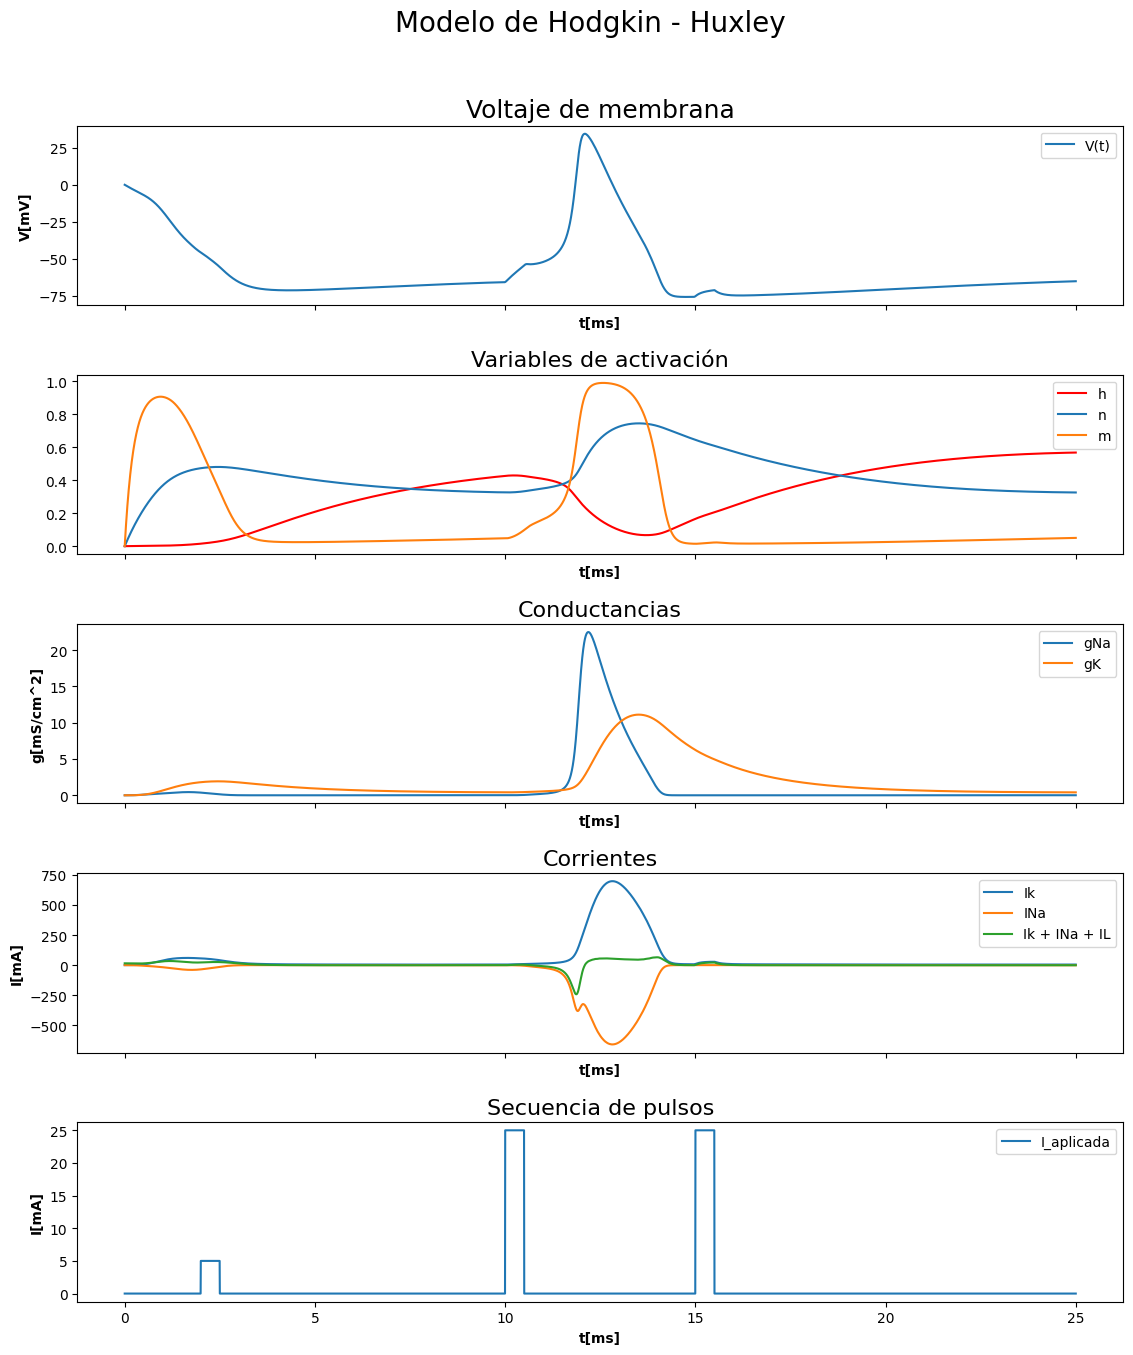

In [ ]:

def Iext2(t):
  if t < 2:
    Iext2 = 0
  elif t >= 2 and t <= 2.5 :
    Iext2 = 5
  elif t >= 10 and t <= 10.5 :
    Iext2 = 25
  elif t >= 15 and t <= 15.5:
    Iext2 = 25
  else:
    Iext2 = 0
  return Iext2


def Hodgkin_Huxley2(t, X, Cm, gna, gk, gl, Ena, Ek, El):

  V = X[0]
  n = X[1]
  m = X[2]
  h = X[3]


  I_ext2= Iext2(t)

  an = 0.01*(V+55)/(1-np.exp(-(V+55)/10))
  bn = 0.125*np.exp(-(V+65)/80)
  am = 0.1*(V+40)/(1-np.exp(-(V+40)/10))
  bm = 4*np.exp(-(V+65)/18)
  ah = 0.07*np.exp(-(V+65)/20)
  bh = 1/(1+np.exp(-(V+35)/10))


  dndt = an*(1-n)-bn*n
  dmdt = am*(1-m)-bm*m
  dhdt = ah*(1-h)-bh*h

  Ina = gna*m**3*h*(V-Ena)
  Ik = gk*n**4*(V-Ek)
  Il = gl*(V-El)


  dVdt = (I_ext2 -(Ina + Ik + Il))/Cm
  return [dVdt, dndt, dmdt,dhdt]

#parametros
Cm,gna,gk,gl,Ena,Ek,El = 1,120,36,0.3,50,-77,-50

tspan = [0, 25]
X0 = [0,0,0,0]

solucion2 = solve_ivp(Hodgkin_Huxley2, tspan, X0,
                     args = (Cm,gna,gk,gl,Ena,Ek,El), dense_output = True)

tdenso = np.linspace(tspan[0], tspan[-1], 5000)
V, n, m, h = solucion2.sol(tdenso)


# Se calcula las conductancias (variables dependietes para el primer grafico)
# de cada ion al dividir la corriente por el potencial asociado a ella (V-Ex),
# donde x es el ion Na y  K. gX = variable, gx = conductancia máxima brindada

gNa = gna*m**3*h
gK = gk*n**4
Ina = gNa * (V - Ena)
Ik = gK*(V - Ek)
Il = gl*(V - El)
I_total = Ina + Ik + Il
I_aplicada2 = np.array([Iext2(i) for i in tdenso])

fig, axs = plt.subplots(5, 1, figsize = (12,14), sharex = True)
fig.suptitle('Modelo de Hodgkin - Huxley', fontsize = 20)
fig.tight_layout(pad = 4.0)


axs[0].plot(tdenso, V, label = 'V(t)')
axs[0].set_title('Voltaje de membrana', fontsize = 18)
axs[0].set_ylabel('V[mV]', fontweight = 'bold')
axs[0].set_xlabel('t[ms]', fontweight = 'bold')
axs[0].legend()

axs[1].plot(tdenso, h, label = 'h', color = 'red')
axs[1].plot(tdenso, n, label = 'n')
axs[1].plot(tdenso, m, label = 'm')
axs[1].set_title('Variables de activación', fontsize = 16)
axs[1].set_xlabel('t[ms]', fontweight = 'bold')
axs[1].legend()

axs[2].plot(tdenso, gNa, label = 'gNa')
axs[2].plot(tdenso, gK, label = 'gK')
axs[2].set_title('Conductancias', fontsize = 16)
axs[2].set_xlabel('t[ms]', fontweight = 'bold')
axs[2].set_ylabel('g[mS/cm^2]', fontweight = 'bold')
axs[2].legend()

axs[3].plot(tdenso, Ik, label = 'Ik')
axs[3].plot(tdenso, Ina, label = 'INa')
axs[3].plot(tdenso, I_total, label = 'Ik + INa + IL')
axs[3].set_xlabel('t[ms]', fontweight = 'bold')
axs[3].set_ylabel('I[mA]', fontweight = 'bold')
axs[3].set_title('Corrientes', fontsize = 16)
axs[3].legend()

axs[4].plot(tdenso, I_aplicada2, label = 'I_aplicada')
axs[4].set_title('Secuencia de pulsos', fontsize = 16)
axs[4].set_xlabel('t[ms]', fontweight = 'bold')
axs[4].set_ylabel('I[mA]', fontweight = 'bold')
axs[4].legend()


## Solución
Se esperaría observar una nueva etapa de pulso nervioso, similar a la sucedida luego de aplicar una corriente externa de 25 mA a los 10 ms. Sin embargo, se observa que no hay alteración algúna, ni en las variables de activación, conductancias ni voltaje de membrana. Lo que concuerda con la existencia de un periode refractario, donde pulsos externos, con magnitud suficiente para generar un impulso nervioso, no alteran el sistema en lo más mínimo.



## Periodo Refractario.
Es el intervalo posterior a un potencial de acción donde se limita la capacidad de general otro impulso eléctrico. Existen dos faces diferente, el periodo refractario absoluto y el periodo refractario relativo
1. Periodo refractario absoluto: Los canales de sodio están inactivos y no permiten la entrada de sodio, impidiendo cualquier corriente de sodio y por lo tanto un nuevo petencial de acción, la duración de esta fase es de aproximadamente 1ms
2. Periodo refractario relativo: Slgunos canales de sodio se han recuperado, no obstante, los canales de potacio continuan activos causando una hiperpolarización, haciendo que el potencial de membrana sea más negativo que en su estado de reposo, siendo necesario un estimulo más intenso para alcanzar el umbral, asegurando un ritmo de disparo controlado y evitando sobrexitaciones.

## Tipo de periodo refractario en el ejercicio
Al proporcionar una corriente absurdamente grande en el modelo, se obtiene un potencial de acción, lo que supone presencia de algúnos canales de Na que han salido de su estado inactivo, por lo tanto, se tiene que el periodo refractario donde tiene lugar un tercer pulso a 5ms del segundo es un periodo refractario relativo

<ipython-input-91-3de923295ab0>:37: RuntimeWarning: overflow encountered in scalar multiply
  Ina = gna*m**3*h*(V-Ena)


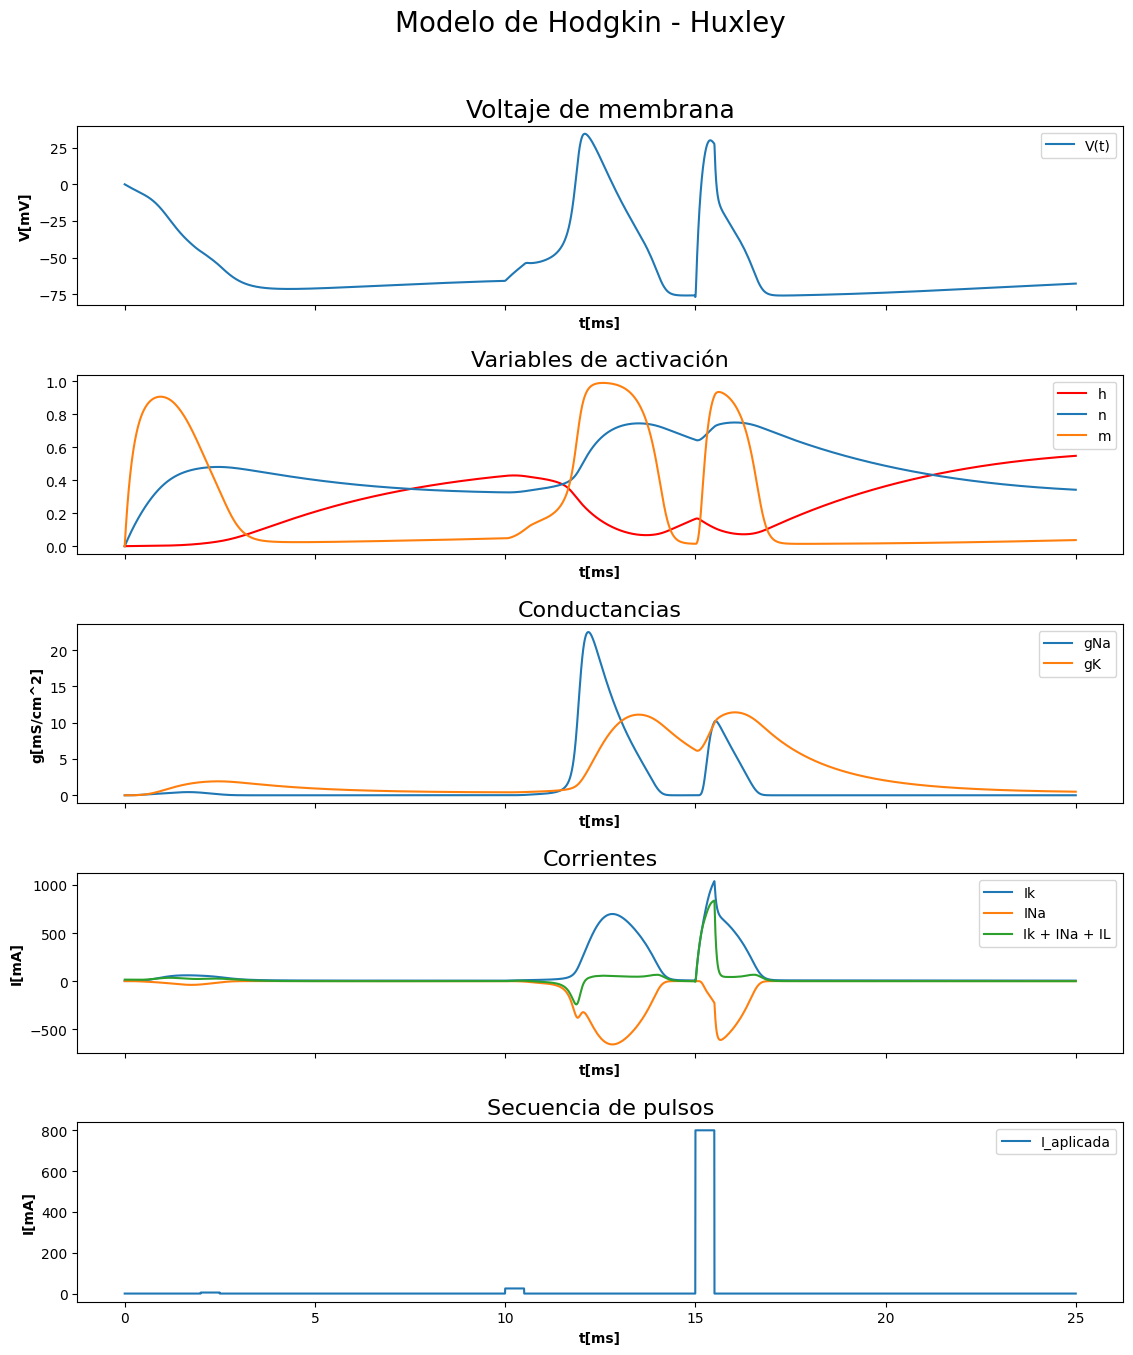

In [ ]:

def Iext2(t):
  if t < 2:
    Iext2 = 0
  elif t >= 2 and t <= 2.5 :
    Iext2 = 5
  elif t >= 10 and t <= 10.5 :
    Iext2 = 25
  elif t >= 15 and t <= 15.5:
    Iext2 = 800
  else:
    Iext2 = 0
  return Iext2


def Hodgkin_Huxley2(t, X, Cm, gna, gk, gl, Ena, Ek, El):

  V = X[0]
  n = X[1]
  m = X[2]
  h = X[3]


  I_ext2= Iext2(t)

  an = 0.01*(V+55)/(1-np.exp(-(V+55)/10))
  bn = 0.125*np.exp(-(V+65)/80)
  am = 0.1*(V+40)/(1-np.exp(-(V+40)/10))
  bm = 4*np.exp(-(V+65)/18)
  ah = 0.07*np.exp(-(V+65)/20)
  bh = 1/(1+np.exp(-(V+35)/10))


  dndt = an*(1-n)-bn*n
  dmdt = am*(1-m)-bm*m
  dhdt = ah*(1-h)-bh*h

  Ina = gna*m**3*h*(V-Ena)
  Ik = gk*n**4*(V-Ek)
  Il = gl*(V-El)


  dVdt = (I_ext2 -(Ina + Ik + Il))/Cm
  return [dVdt, dndt, dmdt,dhdt]

#parametros
Cm,gna,gk,gl,Ena,Ek,El = 1,120,36,0.3,50,-77,-50

tspan = [0, 25]
X0 = [0,0,0,0]

solucion2 = solve_ivp(Hodgkin_Huxley2, tspan, X0,
                     args = (Cm,gna,gk,gl,Ena,Ek,El), dense_output = True)

tdenso = np.linspace(tspan[0], tspan[-1], 5000)
V, n, m, h = solucion2.sol(tdenso)


# Se calcula las conductancias (variables dependietes para el primer grafico)
# de cada ion al dividir la corriente por el potencial asociado a ella (V-Ex),
# donde x es el ion Na y  K. gX = variable, gx = conductancia máxima brindada

gNa = gna*m**3*h
gK = gk*n**4
Ina = gNa * (V - Ena)
Ik = gK*(V - Ek)
Il = gl*(V - El)
I_total = Ina + Ik + Il
I_aplicada2 = np.array([Iext2(i) for i in tdenso])

fig, axs = plt.subplots(5, 1, figsize = (12,14), sharex = True)
fig.suptitle('Modelo de Hodgkin - Huxley', fontsize = 20)
fig.tight_layout(pad = 4.0)


axs[0].plot(tdenso, V, label = 'V(t)')
axs[0].set_title('Voltaje de membrana', fontsize = 18)
axs[0].set_ylabel('V[mV]', fontweight = 'bold')
axs[0].set_xlabel('t[ms]', fontweight = 'bold')
axs[0].legend()

axs[1].plot(tdenso, h, label = 'h', color = 'red')
axs[1].plot(tdenso, n, label = 'n')
axs[1].plot(tdenso, m, label = 'm')
axs[1].set_title('Variables de activación', fontsize = 16)
axs[1].set_xlabel('t[ms]', fontweight = 'bold')
axs[1].legend()

axs[2].plot(tdenso, gNa, label = 'gNa')
axs[2].plot(tdenso, gK, label = 'gK')
axs[2].set_title('Conductancias', fontsize = 16)
axs[2].set_xlabel('t[ms]', fontweight = 'bold')
axs[2].set_ylabel('g[mS/cm^2]', fontweight = 'bold')
axs[2].legend()

axs[3].plot(tdenso, Ik, label = 'Ik')
axs[3].plot(tdenso, Ina, label = 'INa')
axs[3].plot(tdenso, I_total, label = 'Ik + INa + IL')
axs[3].set_xlabel('t[ms]', fontweight = 'bold')
axs[3].set_ylabel('I[mA]', fontweight = 'bold')
axs[3].set_title('Corrientes', fontsize = 16)
axs[3].legend()

axs[4].plot(tdenso, I_aplicada2, label = 'I_aplicada')
axs[4].set_title('Secuencia de pulsos', fontsize = 16)
axs[4].set_xlabel('t[ms]', fontweight = 'bold')
axs[4].set_ylabel('I[mA]', fontweight = 'bold')
axs[4].legend()
